# COVID-19 - Response and Effect by Countries

###  In this study we are going to find the effect of response by various countries in reducing the spread of virus

<img src="covid19img2.png" alt="COVID19" style="width: 100%;" />

### How does the virus spread

COVID-19 is spread from person to person through coughing or sneezing. Virus-carrying airborne droplets can remain in the air or on surfaces even after the ill person is no longer near.

<img src="covidspread01.png" />

In [1]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
cv_df_raw = pandas.read_csv("COVID19_Cases.csv", low_memory=False)

Data Source: 

The data for this project was taken from https://data.world/ and the dataset was https://data.world/covid-19-data-resource-hub/covid-19-case-counts/workspace/file?filename=COVID-19+Cases.csv

<img src="colsprj01.png" alt="Columns" />

In [3]:
# Sample data
cv_df_raw.head(2)

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/10/2020 11:57:57 PM
1,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/10/2020 11:57:57 PM


In [4]:
cv_df_raw.shape

(774400, 18)

In [5]:
cv_df_all_countries = cv_df_raw.copy()

# Prepare data for analysis
cv_df_all_countries = cv_df_all_countries.drop(columns=["Difference", "Province_State", "Admin2", "iso2",	"iso3", "Combined_Key", "Prep_Flow_Runtime", "Lat", "Long", "FIPS", "People_Total_Tested_Count", "Population_Count", "People_Hospitalized_Cumulative_Count", "Data_Source", "Date"])
cv_df_all_countries = cv_df_all_countries[(cv_df_all_countries["Case_Type"] == "Confirmed")]
cv_df_all_countries_summary = cv_df_all_countries.groupby(["Country_Region"])["Cases"].sum().rename("Total_Cases").reset_index()

# Filter to reduce noise
cv_df_all_countries_summary = cv_df_all_countries_summary[(cv_df_all_countries_summary["Total_Cases"] > 500000)]


In [6]:
cv_df_all_countries.describe()

,Cases
count,387200.000000
mean,286.173314
std,4611.900845
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,224350.000000


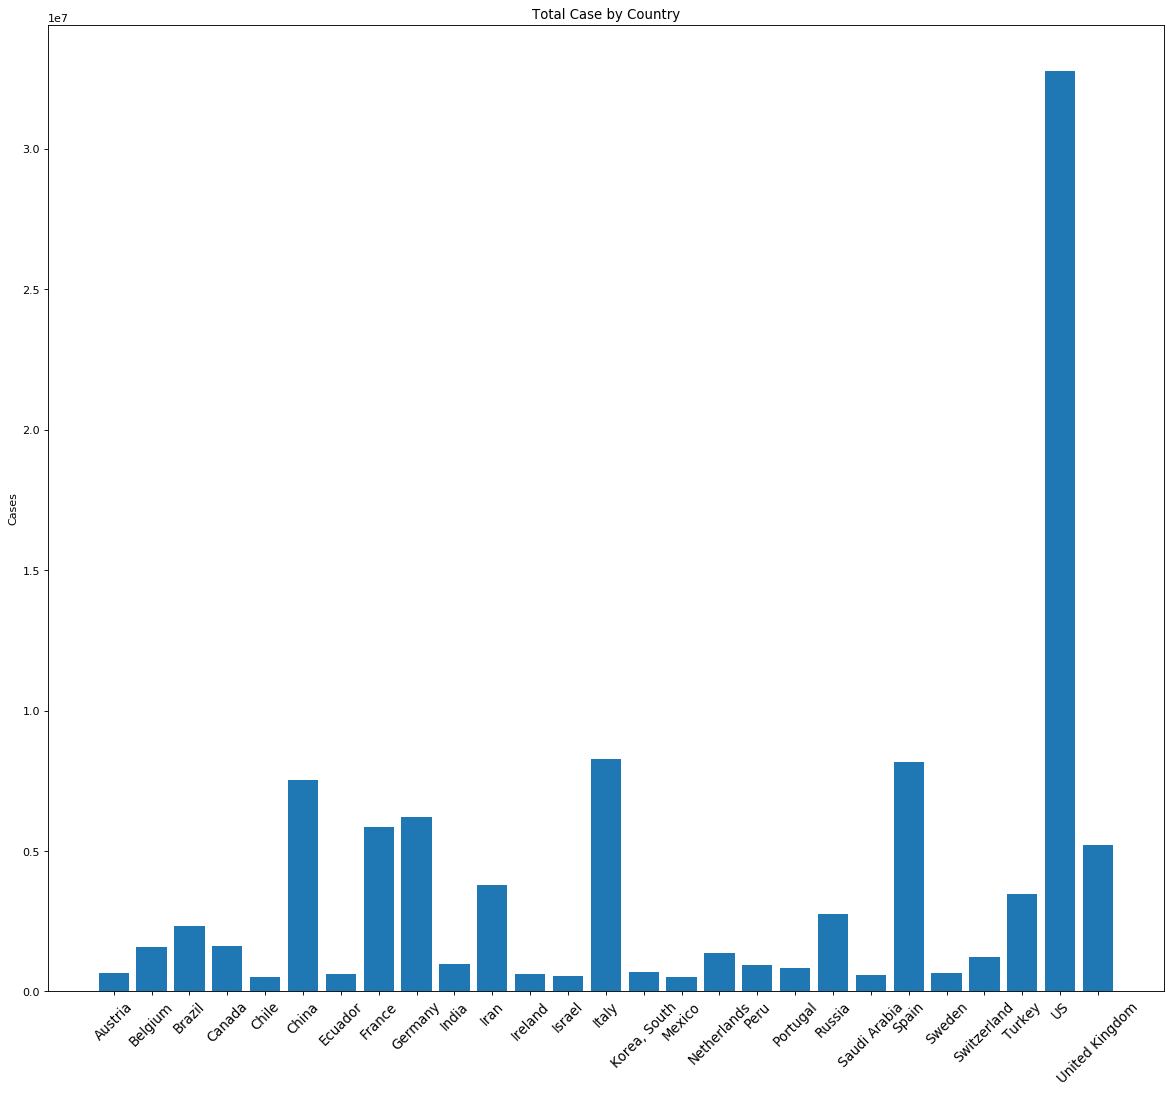

In [7]:
fig1, ax1 = plt.subplots(1,1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax1.bar(cv_df_all_countries_summary["Country_Region"], cv_df_all_countries_summary["Total_Cases"])
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Cases')
plt.title('Total Case by Country')
plt.show()

### From the above graph we see the number of total cases reported is very high for US. High cases were also reported in Italy, Spain, China, UK etc. This could be misleading becuase it does not consider the overall population. So let us considering the countries population.

In [8]:
cv_df_1 = cv_df_raw.copy()
cv_df_1 = cv_df_1.drop(columns=["Difference", "Province_State", "Admin2", "iso2",	"iso3", "Combined_Key", "Prep_Flow_Runtime", "Lat", "Long", "FIPS", "People_Total_Tested_Count", "People_Hospitalized_Cumulative_Count", "Data_Source", "Date"])
cv_df_1 = cv_df_1[(cv_df_1["Case_Type"] == "Confirmed")]
cv_df_1_summary = cv_df_1.groupby(["Country_Region"])["Cases", "Population_Count"].sum()
cv_df_1_summary = cv_df_1_summary.reset_index()
cv_df_1_summary["Cases_per_Population"] = ((cv_df_1_summary["Cases"] / cv_df_1_summary["Population_Count"]) * 100000)
cv_df_1_summary = cv_df_1_summary[(cv_df_1_summary["Cases"] > 500000)]

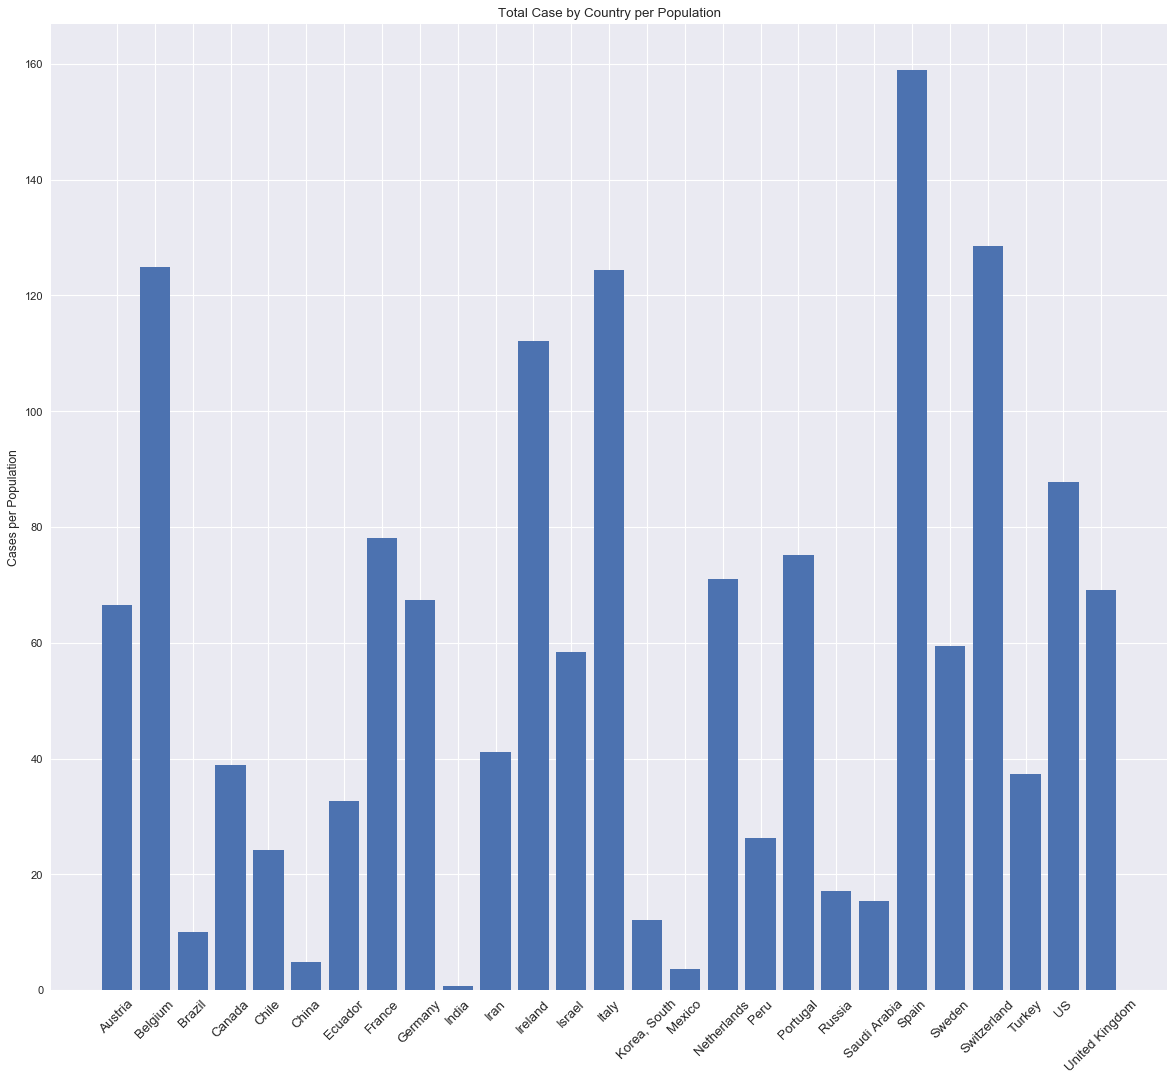

In [9]:
plt.style.use("seaborn")
fig1, ax1 = plt.subplots(1,1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1.bar(cv_df_1_summary["Country_Region"], cv_df_1_summary["Cases_per_Population"])
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Cases per Population')
plt.title('Total Case by Country per Population')
# plt.grid(True)
plt.show()


### The above chart shows cases per total population in the country. Here we see Spain leads the way followed by many other European countries. US is in the sixth place.

In [10]:
cv_df_1_summary = cv_df_1_summary.sort_values("Cases_per_Population", ascending=False).head(10)

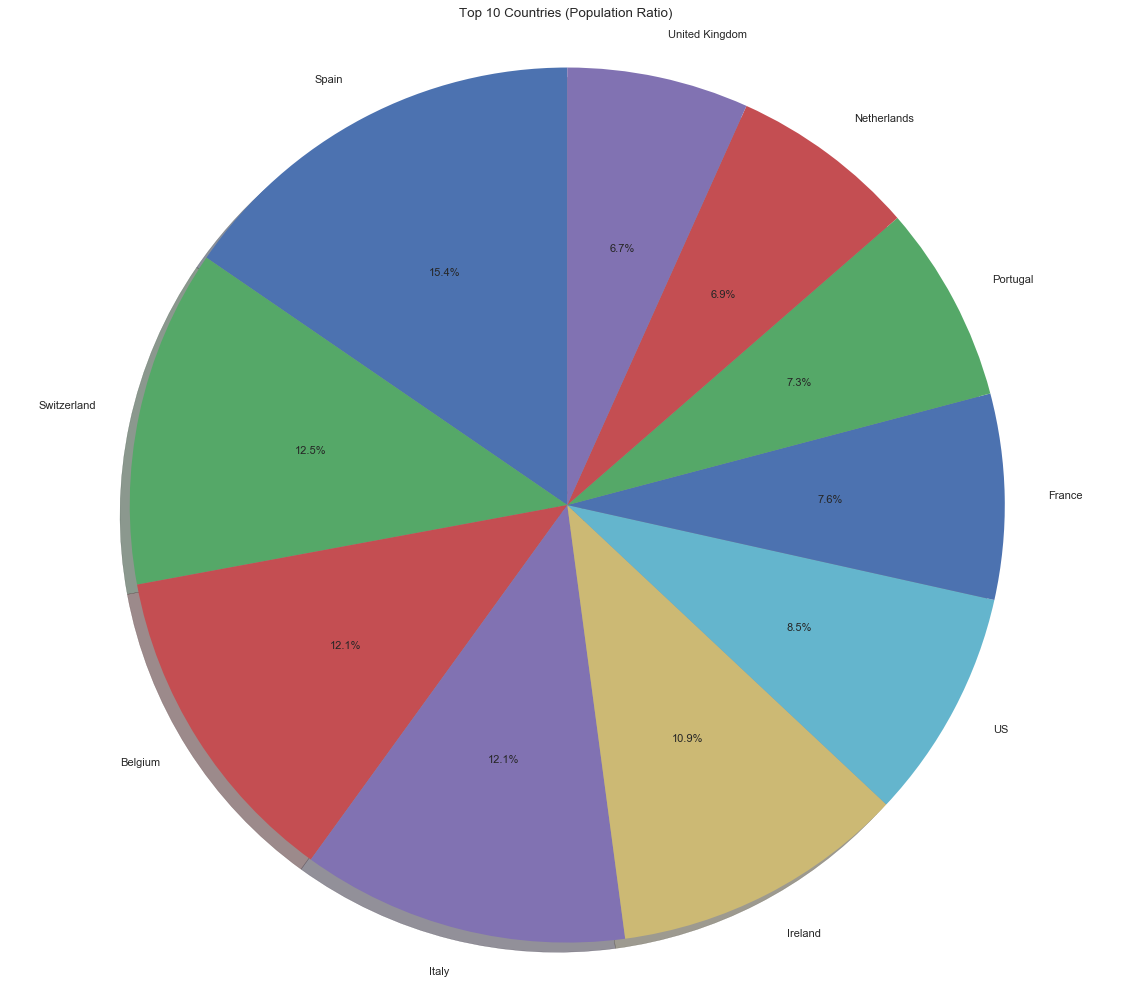

In [11]:
fig1, ax1 = plt.subplots(1,1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1.pie(cv_df_1_summary["Cases_per_Population"], labels=cv_df_1_summary["Country_Region"], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Countries (Population Ratio)')
plt.show()

### The above pie chart shows the number of cases per country. The covid cases is clear here.

<img src="covis_response01.png" alt="Response" />

## United States

The response to COVID-19 by United States was largely decentralised with states imposing measures based on the spread in that states. The US response has been mixed depending on the state. Amoung the state wide measures, school closing, lockdown, closure of non-essential business etc are some mitigation measures.   

In [12]:
cv_df_tl = cv_df_raw.copy()
cv_df_tl = cv_df_tl.drop(columns=["Difference", "Province_State", "Admin2", "iso2",	"iso3", "Combined_Key", "Prep_Flow_Runtime", "Lat", "Long", "FIPS", "People_Total_Tested_Count", "Population_Count", "People_Hospitalized_Cumulative_Count", "Data_Source"])
cv_df_tl_us = cv_df_tl[(cv_df_tl["Case_Type"] == "Confirmed") & (cv_df_tl["Country_Region"] == "US")]

cv_df_tl_us = cv_df_tl_us.sort_values("Date", ascending=True)
cv_df_tl_d_us = cv_df_tl_us.groupby(["Country_Region", "Date"])["Cases"].sum()
cv_df_tl_d_us = cv_df_tl_d_us.reset_index()

cv_df_tl_d_us["avgcases"] = cv_df_tl_d_us["Cases"].rolling(15).mean()

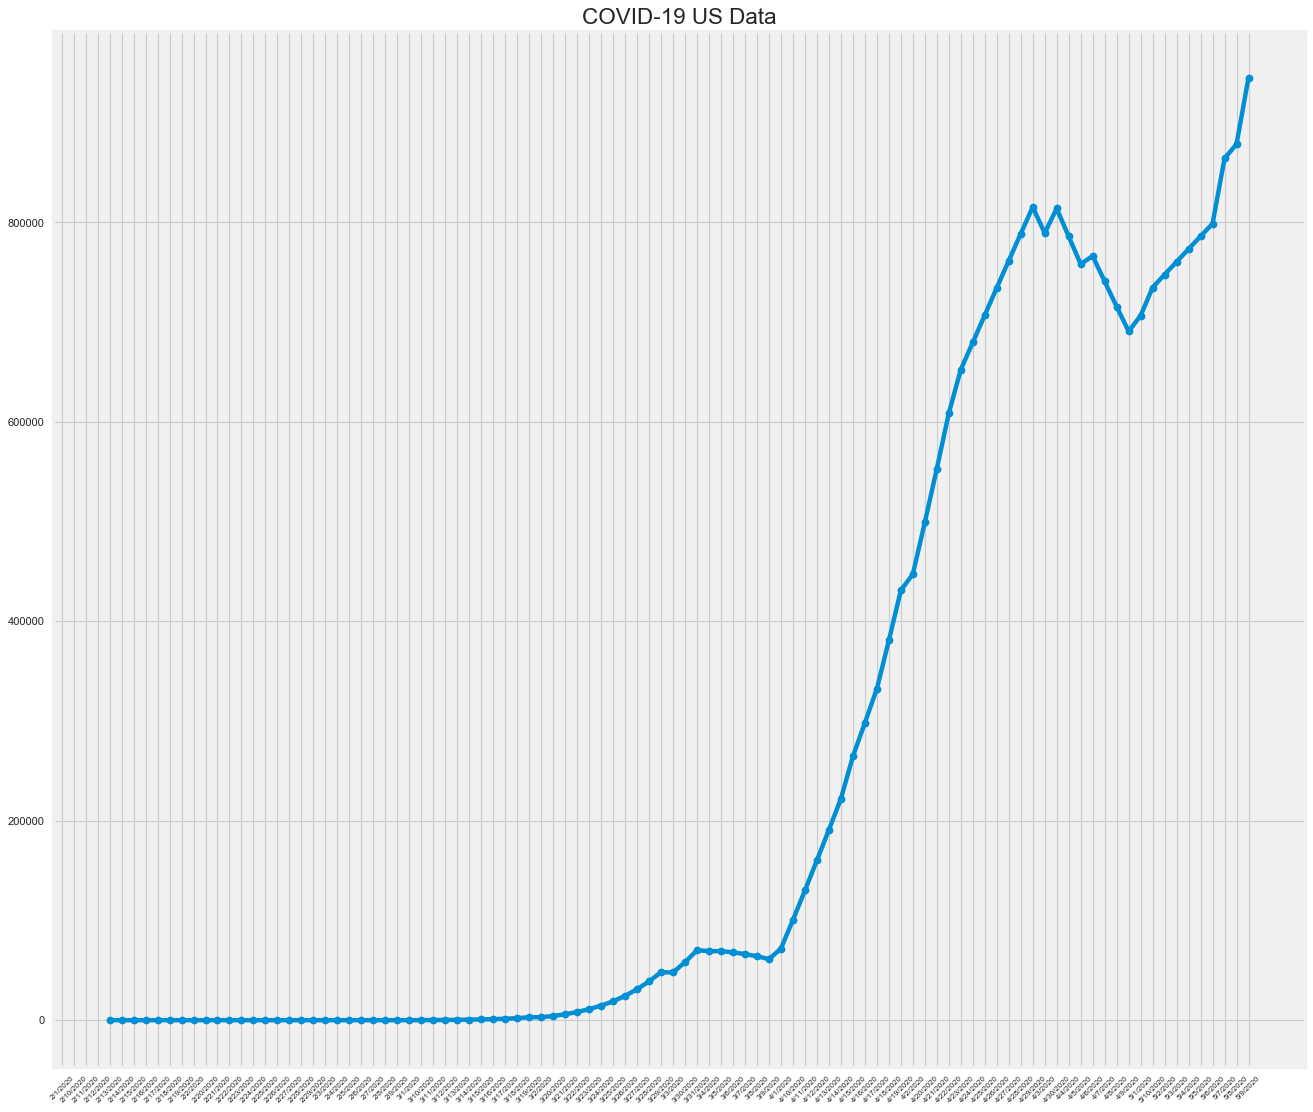

In [13]:
plt.style.use("fivethirtyeight")
fig1, ax1 = plt.subplots(1,1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1.plot_date(cv_df_tl_d_us["Date"], cv_df_tl_d_us["avgcases"], linestyle="solid")
plt.title('COVID-19 US Data')
plt.xticks(rotation=45, fontsize=7)
plt.show()

## Spain

Sweden asked its citizens to practice social distancing on a mostly voluntary basis. Swedish authorities imposed some restrictions designed to flatten the curve: no public gatherings of more than 50 people, no bar service, distance learning in high schools and universities, and so on.

In [14]:
cv_df_tl_spain = cv_df_tl[(cv_df_tl["Case_Type"] == "Confirmed") & (cv_df_tl["Country_Region"] == "Spain")]

cv_df_tl_spain = cv_df_tl_spain.sort_values("Date", ascending=True)

cv_df_tl_d_spain = cv_df_tl_spain.groupby(["Country_Region", "Date"])["Cases"].sum()
cv_df_tl_d_spain = cv_df_tl_d_spain.reset_index()

cv_df_tl_d_spain["avgcases"] = cv_df_tl_d_spain["Cases"].rolling(15).mean()

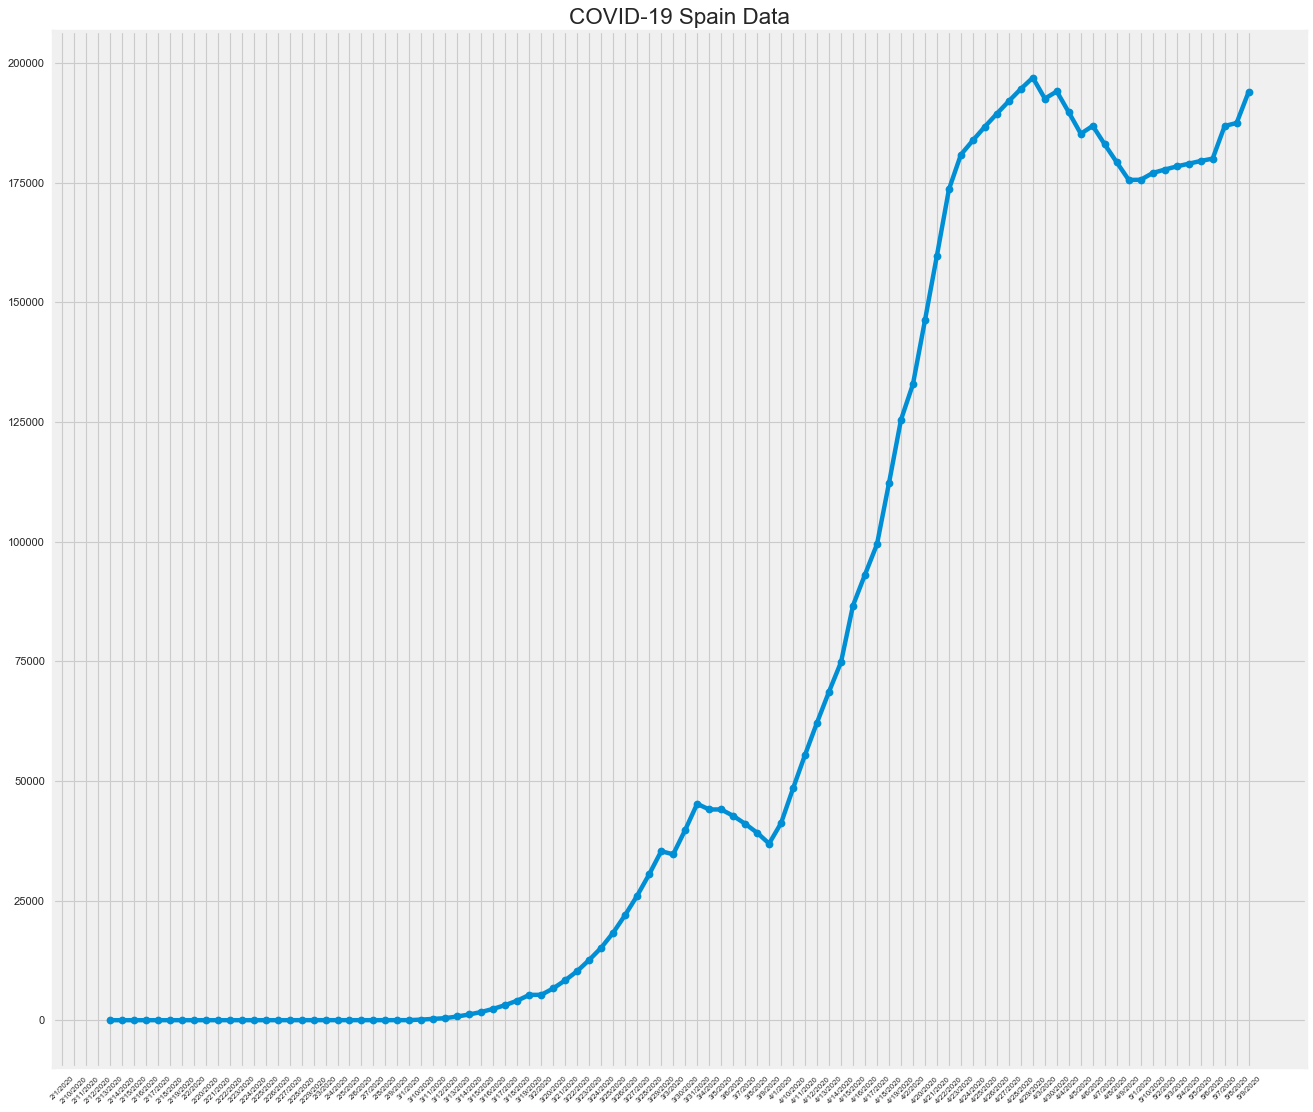

In [15]:
plt.style.use("fivethirtyeight")
fig1, ax1 = plt.subplots(1,1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1.plot_date(cv_df_tl_d_spain["Date"], cv_df_tl_d_spain["avgcases"], linestyle="solid")
plt.title('COVID-19 Spain Data')
plt.xticks(rotation=45, fontsize=7)
plt.show()

## South Korea

Because the government’s response to SARS had been sharply criticized, it ramped up its disease control infrastructure prior to the coronavirus.  When the virus was reported in China, South Korea moved quickly to develop a test. South Korea’s response has been based on massive testing, contact tracing, and quarantine of exposed individuals. The country has the highest per capita testing rate in the world.

In [16]:
cv_df_tl_skorea = cv_df_tl[(cv_df_tl["Case_Type"] == "Confirmed") & (cv_df_tl["Country_Region"] == "Korea, South")]

cv_df_tl_skorea = cv_df_tl_skorea.sort_values("Date", ascending=True)

cv_df_tl_d_skorea = cv_df_tl_skorea.groupby(["Country_Region", "Date"])["Cases"].sum()
cv_df_tl_d_skorea = cv_df_tl_d_skorea.reset_index()

cv_df_tl_d_skorea["avgcases"] = cv_df_tl_d_skorea["Cases"].rolling(15).mean()

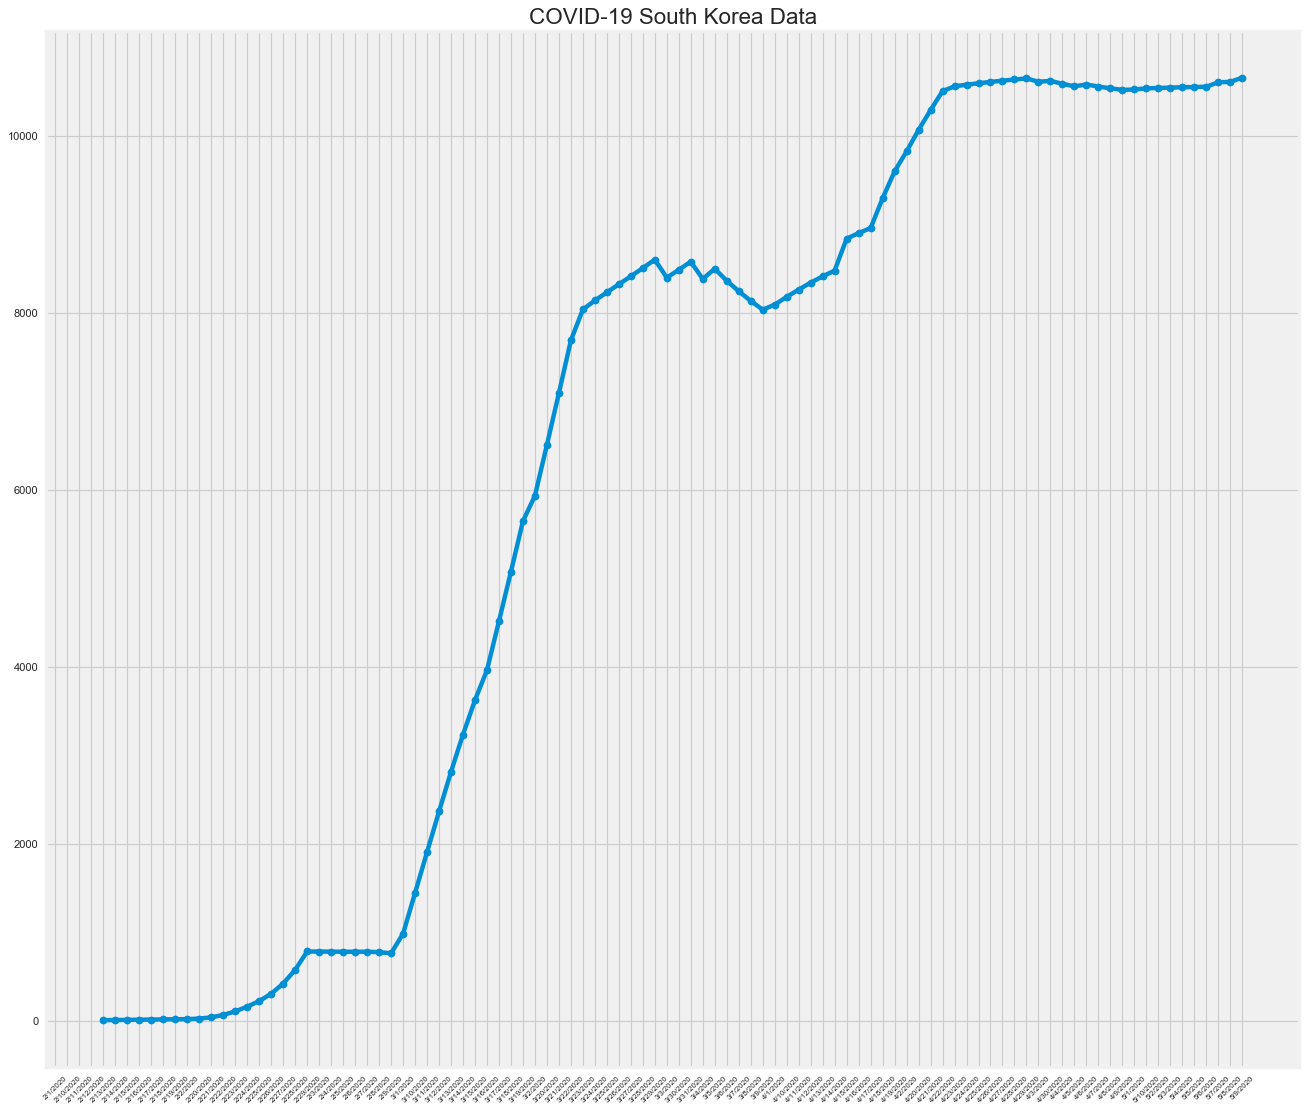

In [17]:
plt.style.use("fivethirtyeight")
fig1, ax1 = plt.subplots(1,1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1.plot_date(cv_df_tl_d_skorea["Date"], cv_df_tl_d_skorea["avgcases"], linestyle="solid")
plt.title('COVID-19 South Korea Data')
plt.xticks(rotation=45, fontsize=7)
plt.show()

## China

In mid-January, Chinese authorities introduced unprecedented measures to contain the virus, stopping movement in and out of Wuhan, the centre of the epidemic, and 15 other cities in Hubei province - home to more than 60 million people. Flights and trains were suspended, and roads were blocked. Soon after, people in many Chinese cities were told to stay at home and venture out only to get food or medical help. Some 760 million people, roughly half the country’s population, were confined to their homes

In [18]:
cv_df_tl_china = cv_df_tl[(cv_df_tl["Case_Type"] == "Confirmed") & (cv_df_tl["Country_Region"] == "China")]

cv_df_tl_china = cv_df_tl_china.sort_values("Date", ascending=True)

cv_df_tl_d_china = cv_df_tl_china.groupby(["Country_Region", "Date"])["Cases"].sum()
cv_df_tl_d_china = cv_df_tl_d_china.reset_index()

cv_df_tl_d_china["avgcases"] = cv_df_tl_d_china["Cases"].rolling(15).mean()

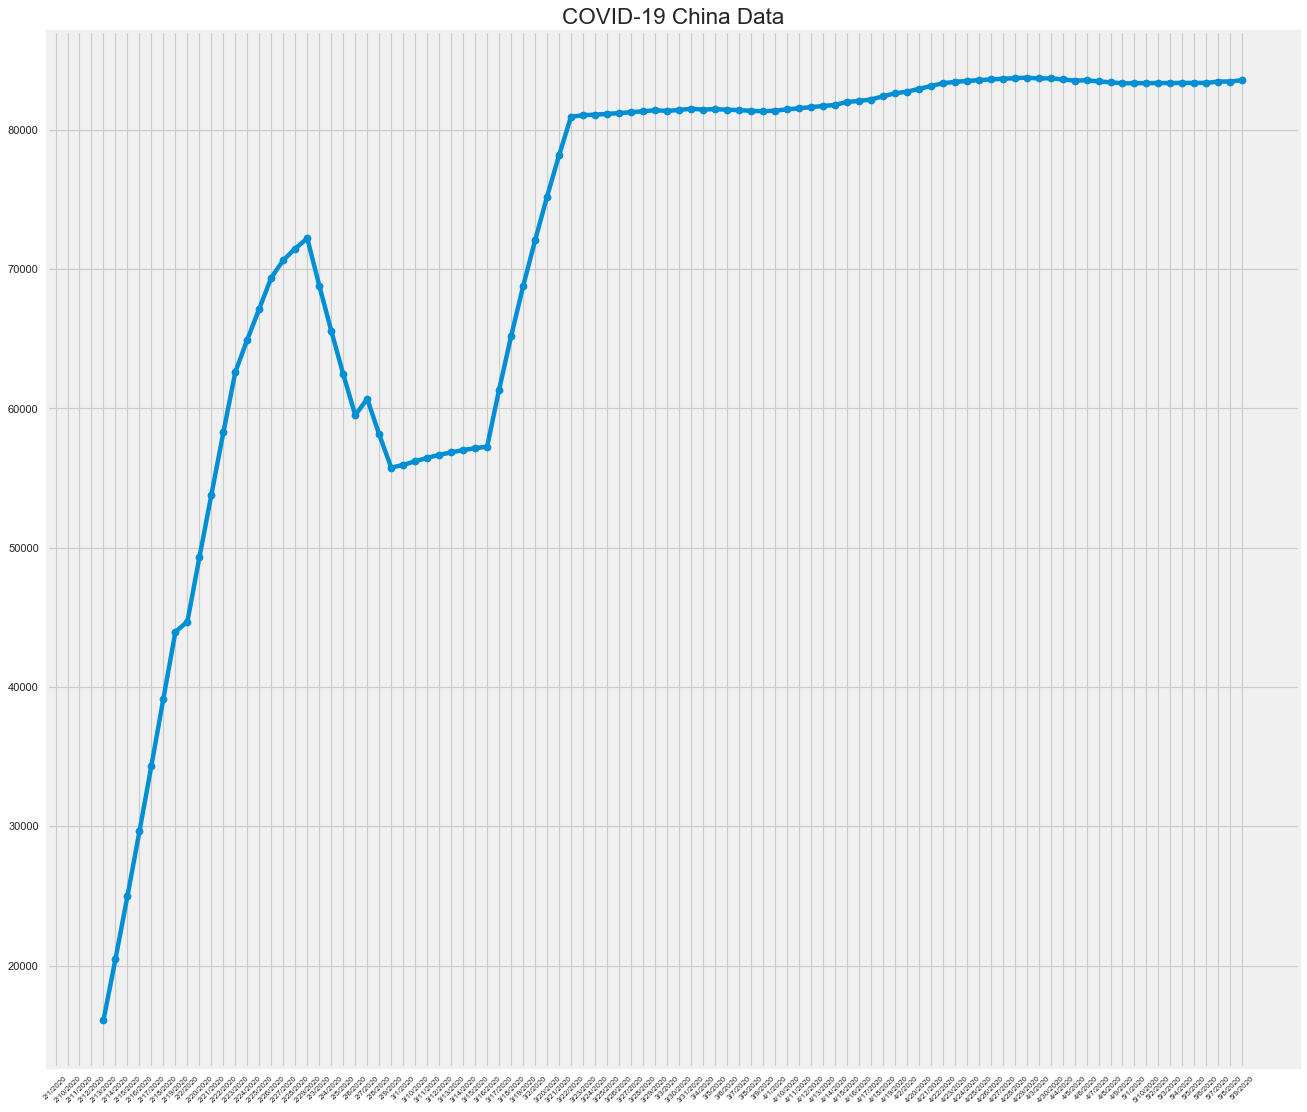

In [19]:
plt.style.use("fivethirtyeight")
fig1, ax1 = plt.subplots(1,1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1.plot_date(cv_df_tl_d_china["Date"], cv_df_tl_d_china["avgcases"], linestyle="solid")
plt.title('COVID-19 China Data')
plt.xticks(rotation=45, fontsize=7)
plt.show()

## Conclusion

<img src="response_001.png" alt="Response" />